In [28]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('building-permits.csv')

C:\Users\Mike\anaconda3\envs\vis\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1,49,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


First I will create a Series I will be using to look at this dataset as a whole, then drop many columns for the dataset I will be using after

In [30]:
S = pd.Series(data=df['PROCESSING_TIME'])
S.describe()

count    605890.000000
mean         22.760904
std         109.024726
min       -2876.000000
25%           0.000000
50%           0.000000
75%           8.000000
max        4770.000000
Name: PROCESSING_TIME, dtype: float64

In [31]:
col = df.columns
print(col.to_list())

['ID', 'PERMIT#', 'PERMIT_TYPE', 'REVIEW_TYPE', 'APPLICATION_START_DATE', 'ISSUE_DATE', 'PROCESSING_TIME', 'STREET_NUMBER', 'STREET DIRECTION', 'STREET_NAME', 'SUFFIX', 'WORK_DESCRIPTION', 'BUILDING_FEE_PAID', 'ZONING_FEE_PAID', 'OTHER_FEE_PAID', 'SUBTOTAL_PAID', 'BUILDING_FEE_UNPAID', 'ZONING_FEE_UNPAID', 'OTHER_FEE_UNPAID', 'SUBTOTAL_UNPAID', 'BUILDING_FEE_WAIVED', 'ZONING_FEE_WAIVED', 'OTHER_FEE_WAIVED', 'SUBTOTAL_WAIVED', 'TOTAL_FEE', 'CONTACT_1_TYPE', 'CONTACT_1_NAME', 'CONTACT_1_CITY', 'CONTACT_1_STATE', 'CONTACT_1_ZIPCODE', 'CONTACT_2_TYPE', 'CONTACT_2_NAME', 'CONTACT_2_CITY', 'CONTACT_2_STATE', 'CONTACT_2_ZIPCODE', 'CONTACT_3_TYPE', 'CONTACT_3_NAME', 'CONTACT_3_CITY', 'CONTACT_3_STATE', 'CONTACT_3_ZIPCODE', 'CONTACT_4_TYPE', 'CONTACT_4_NAME', 'CONTACT_4_CITY', 'CONTACT_4_STATE', 'CONTACT_4_ZIPCODE', 'CONTACT_5_TYPE', 'CONTACT_5_NAME', 'CONTACT_5_CITY', 'CONTACT_5_STATE', 'CONTACT_5_ZIPCODE', 'CONTACT_6_TYPE', 'CONTACT_6_NAME', 'CONTACT_6_CITY', 'CONTACT_6_STATE', 'CONTACT_6_ZIP

In [32]:
df = df.drop(columns=['ID', 'PERMIT#', 'ISSUE_DATE','STREET_NUMBER', 'STREET DIRECTION', 'STREET_NAME', 'SUFFIX', 'WORK_DESCRIPTION', 'BUILDING_FEE_PAID', 'ZONING_FEE_PAID', 'OTHER_FEE_PAID', 'SUBTOTAL_PAID', 'BUILDING_FEE_UNPAID', 'ZONING_FEE_UNPAID', 'OTHER_FEE_UNPAID', 'SUBTOTAL_UNPAID', 'BUILDING_FEE_WAIVED', 'ZONING_FEE_WAIVED', 'OTHER_FEE_WAIVED', 'SUBTOTAL_WAIVED', 'TOTAL_FEE', 'CONTACT_1_TYPE', 'CONTACT_1_NAME', 'CONTACT_1_CITY', 'CONTACT_1_STATE', 'CONTACT_1_ZIPCODE', 'CONTACT_2_TYPE', 'CONTACT_2_NAME', 'CONTACT_2_CITY', 'CONTACT_2_STATE', 'CONTACT_2_ZIPCODE', 'CONTACT_3_TYPE', 'CONTACT_3_NAME', 'CONTACT_3_CITY', 'CONTACT_3_STATE', 'CONTACT_3_ZIPCODE', 'CONTACT_4_TYPE', 'CONTACT_4_NAME', 'CONTACT_4_CITY', 'CONTACT_4_STATE', 'CONTACT_4_ZIPCODE', 'CONTACT_5_TYPE', 'CONTACT_5_NAME', 'CONTACT_5_CITY', 'CONTACT_5_STATE', 'CONTACT_5_ZIPCODE', 'CONTACT_6_TYPE', 'CONTACT_6_NAME', 'CONTACT_6_CITY', 'CONTACT_6_STATE', 'CONTACT_6_ZIPCODE', 'CONTACT_7_TYPE', 'CONTACT_7_NAME', 'CONTACT_7_CITY', 'CONTACT_7_STATE', 'CONTACT_7_ZIPCODE', 'CONTACT_8_TYPE', 'CONTACT_8_NAME', 'CONTACT_8_CITY', 'CONTACT_8_STATE', 'CONTACT_8_ZIPCODE', 'CONTACT_9_TYPE', 'CONTACT_9_NAME', 'CONTACT_9_CITY', 'CONTACT_9_STATE', 'CONTACT_9_ZIPCODE', 'CONTACT_10_TYPE', 'CONTACT_10_NAME', 'CONTACT_10_CITY', 'CONTACT_10_STATE', 'CONTACT_10_ZIPCODE', 'CONTACT_11_TYPE', 'CONTACT_11_NAME', 'CONTACT_11_CITY', 'CONTACT_11_STATE', 'CONTACT_11_ZIPCODE', 'CONTACT_12_TYPE', 'CONTACT_12_NAME', 'CONTACT_12_CITY', 'CONTACT_12_STATE', 'CONTACT_12_ZIPCODE', 'CONTACT_13_TYPE', 'CONTACT_13_NAME', 'CONTACT_13_CITY', 'CONTACT_13_STATE', 'CONTACT_13_ZIPCODE', 'CONTACT_14_TYPE', 'CONTACT_14_NAME', 'CONTACT_14_CITY', 'CONTACT_14_STATE', 'CONTACT_14_ZIPCODE', 'CONTACT_15_TYPE', 'CONTACT_15_NAME', 'CONTACT_15_CITY', 'CONTACT_15_STATE', 'CONTACT_15_ZIPCODE', 'REPORTED_COST', 'PIN1', 'PIN2', 'PIN3', 'PIN4', 'PIN5', 'PIN6', 'PIN7', 'PIN8', 'PIN9', 'PIN10', 'COMMUNITY_AREA', 'CENSUS_TRACT', 'WARD', 'XCOORDINATE', 'YCOORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'Boundaries - ZIP Codes', 'Community Areas', 'Zip Codes', 'Census Tracts', 'Wards', ':@computed_region_awaf_s7ux'])
df.head()

,PERMIT_TYPE,REVIEW_TYPE,APPLICATION_START_DATE,PROCESSING_TIME
0,PERMIT - SIGNS,SIGN PERMIT,2014-02-24T00:00:00.000,8.0
1,PERMIT - SIGNS,SIGN PERMIT,2013-11-18T00:00:00.000,31.0
2,PERMIT - SIGNS,SIGN PERMIT,2013-11-18T00:00:00.000,31.0
3,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,2017-01-25T00:00:00.000,0.0
4,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,2007-02-15T00:00:00.000,0.0


I know I must get rid of null values in the processing time column, seems as if I do not have any.

In [33]:
print(df.shape)
def find_null(col):
    print('Do I have any null values in my dataframe, if so, how many')
    print(df.isnull().values.any())
    print(df.isnull().sum().sum())
    print('Do I have any null values in my Column of interest, if so, how many')
    print(df[col].isnull().values.any())
    print(df[col].isnull().sum())

find_null('PROCESSING_TIME')
df = df[df['PROCESSING_TIME'].notna()]
print('Lets hope this is false')
print(df['PROCESSING_TIME'].isnull().values.any())
print(df.shape)
    # df.dropna(inplace=True)
    # print(df['PROCESSING_TIME'].isnull().values.any())

(606390, 4)
Do I have any null values in my dataframe, if so, how many
True
1006
Do I have any null values in my Column of interest, if so, how many
True
500
Lets hope this is false
False
(605890, 4)


I will try to create a histogram of this data,  I will restrict it to positive numbers and cut it off at 500, there are not many data points out here.

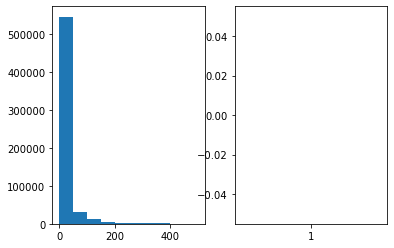

In [34]:
plt.subplot(1,2,1)
plt.hist(S,range=(0,500))
plt.subplot(1,2,2)
x = plt.boxplot(S)

This did not plot, maybe the data is too weird, we have negative numbers, most quartiles are 0 and mean is only 8.  Let's Investigate, I have 500 rows with nan, lets purge.

In [35]:
print('The length of S is: ' + str(len(S)))
print(S.isnull().values.any())
S.dropna(inplace=True)
print(S.isnull().values.any())
print('The length of S is: ' + str(len(S)))

The length of S is: 606390
True
False
The length of S is: 605890


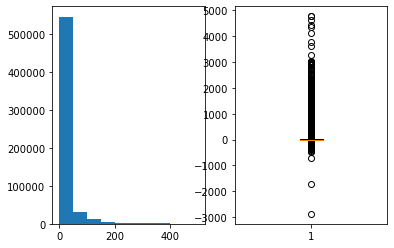

In [36]:
plt.subplot(1,2,1)
plt.hist(S,range=(0,500))
plt.subplot(1,2,2)
x=plt.boxplot(S)

Here what we have is an IQR that is 8, very small and we get circles for the other data points.  Circles are outliers.

In [37]:
#x = df['REVIEW_TYPE'].to_list()
x = df['PERMIT_TYPE'].to_list()
xs = set(x)
print(xs)

{'PERMIT - ELEVATOR EQUIPMENT', 'PERMIT - REINSTATE REVOKED PMT', 'PERMIT - RENOVATION/ALTERATION', 'PERMIT - SCAFFOLDING', 'PERMIT - ELECTRIC WIRING', 'PERMIT - SIGNS', 'PERMIT - EASY PERMIT PROCESS', 'PERMIT - FOR EXTENSION OF PMT', 'PERMIT - WRECKING/DEMOLITION', 'PERMIT - NEW CONSTRUCTION', 'PERMIT - PORCH CONSTRUCTION'}


In [38]:
df_elev = df.loc[df['PERMIT_TYPE'] == 'PERMIT - ELEVATOR EQUIPMENT']
df_revoke = df.loc[df['PERMIT_TYPE'] == 'PERMIT - REINSTATE REVOKED PMT']
df_renov = df.loc[df['PERMIT_TYPE'] == 'PERMIT - RENOVATION/ALTERATION']
df_scaffold = df.loc[df['PERMIT_TYPE'] == 'PERMIT - SCAFFOLDING']
df_wire = df.loc[df['PERMIT_TYPE'] == 'PERMIT - ELECTRIC WIRING']
df_sign = df.loc[df['PERMIT_TYPE'] == 'PERMIT - SIGNS']
df_easy = df.loc[df['PERMIT_TYPE'] == 'PERMIT - EASY PERMIT PROCESS']
df_ext = df.loc[df['PERMIT_TYPE'] == 'PERMIT - FOR EXTENSION OF PMT']
df_demo = df.loc[df['PERMIT_TYPE'] == 'PERMIT - WRECKING/DEMOLITION']
df_newcon = df.loc[df['PERMIT_TYPE'] == 'PERMIT - NEW CONSTRUCTION']
#df_newcon.head()
df_porch = df.loc[df['PERMIT_TYPE'] == 'PERMIT - PORCH CONSTRUCTION']

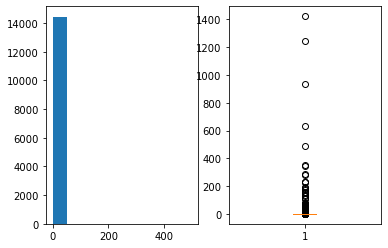

In [42]:
# ======================================================= Elevator Equipment
plt.subplot(1,2,1)
plt.hist(df_elev['PROCESSING_TIME'],range=(0,500))
plt.subplot(1,2,2)
x = plt.boxplot(df_elev['PROCESSING_TIME'])





# plt.subplot(11,2,11)
# plt.hist(df_newcon['PROCESSING_TIME'],range=(0,500))
# plt.subplot(11,2,12)
# x = plt.boxplot(df_newcon['PROCESSING_TIME'])

# plt.subplot(11,2,11)
# plt.hist(df_porch['PROCESSING_TIME'],range=(0,500))
# plt.subplot(11,2,12)
# x = plt.boxplot(df_porch['PROCESSING_TIME'])


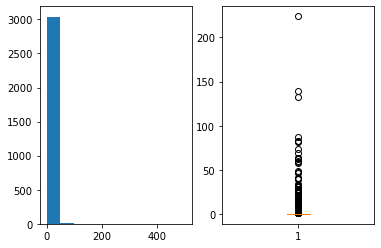

In [43]:
# ======================================================= Reinstate Revoked Permit
plt.subplot(1,2,1)
plt.hist(df_revoke['PROCESSING_TIME'],range=(0,500))
plt.subplot(1,2,2)
x = plt.boxplot(df_revoke['PROCESSING_TIME'])

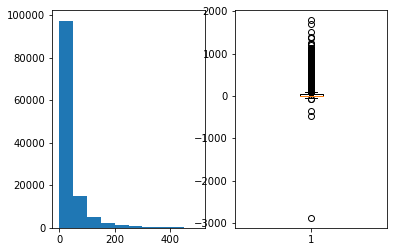

In [44]:
# ======================================================= Renovation / ALteration
plt.subplot(1,2,1)
plt.hist(df_renov['PROCESSING_TIME'],range=(0,500))
plt.subplot(1,2,2)
x = plt.boxplot(df_renov['PROCESSING_TIME'])

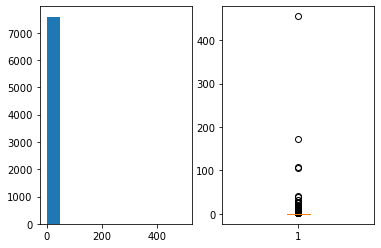

In [45]:
# ======================================================= Scaffolding
plt.subplot(1,2,1)
plt.hist(df_scaffold['PROCESSING_TIME'],range=(0,500))
plt.subplot(1,2,2)
x = plt.boxplot(df_scaffold['PROCESSING_TIME'])

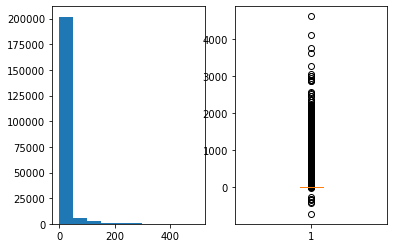

In [46]:
# ======================================================= Electric Wiring
plt.subplot(1,2,1)
plt.hist(df_wire['PROCESSING_TIME'],range=(0,500))
plt.subplot(1,2,2)
x = plt.boxplot(df_wire['PROCESSING_TIME'])

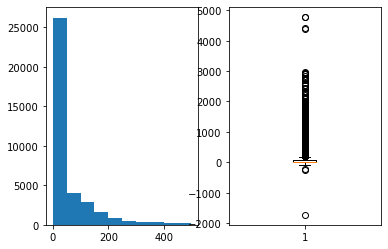

In [47]:
# ======================================================= Sign
plt.subplot(1,2,1)
plt.hist(df_sign['PROCESSING_TIME'],range=(0,500))
plt.subplot(1,2,2)
x = plt.boxplot(df_sign['PROCESSING_TIME'])

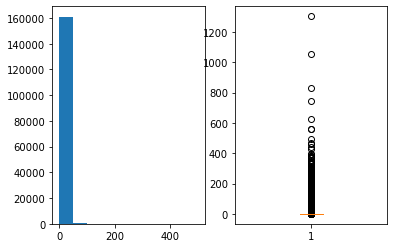

In [48]:
# ======================================================= Easy Permit Process
plt.subplot(1,2,1)
plt.hist(df_easy['PROCESSING_TIME'],range=(0,500))
plt.subplot(1,2,2)
x = plt.boxplot(df_easy['PROCESSING_TIME'])

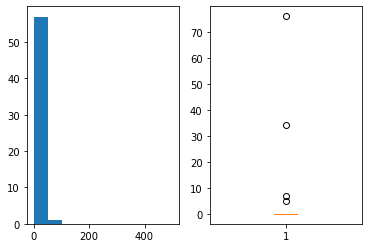

In [49]:
# ======================================================= For Extension of Pmt
plt.subplot(1,2,1)
plt.hist(df_ext['PROCESSING_TIME'],range=(0,500))
plt.subplot(1,2,2)
x = plt.boxplot(df_ext['PROCESSING_TIME'])

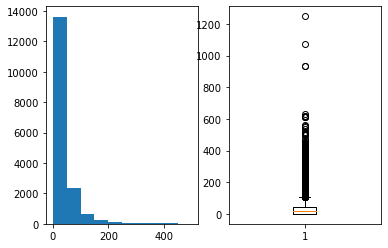

In [50]:
# ======================================================= Wrecking / Demolition
plt.subplot(1,2,1)
plt.hist(df_demo['PROCESSING_TIME'],range=(0,500))
plt.subplot(1,2,2)
x = plt.boxplot(df_demo['PROCESSING_TIME'])

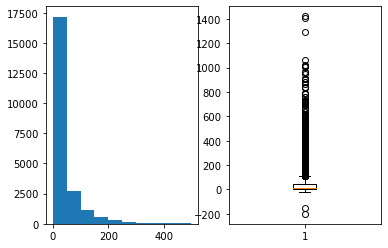

In [51]:
# ======================================================= New Construction
plt.subplot(1,2,1)
plt.hist(df_newcon['PROCESSING_TIME'],range=(0,500))
plt.subplot(1,2,2)
x = plt.boxplot(df_newcon['PROCESSING_TIME'])

In [53]:
df_newcon['PROCESSING_TIME'].describe()

count    22419.000000
mean        37.902047
std         74.344358
min       -201.000000
25%          0.000000
50%          8.000000
75%         45.000000
max       1421.000000
Name: PROCESSING_TIME, dtype: float64

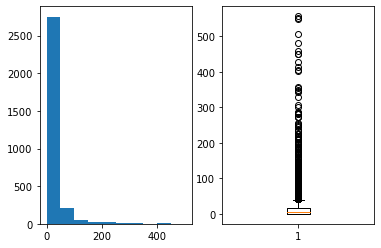

In [52]:
# ======================================================= Porch Construction
plt.subplot(1,2,1)
plt.hist(df_porch['PROCESSING_TIME'],range=(0,500))
plt.subplot(1,2,2)
x = plt.boxplot(df_porch['PROCESSING_TIME'])

Do these plots make sense?  I Feels like there are alot of outliers

I would like to know the percentage of outliers to the total data points.  First I should do this exercise for the other types of building permits.

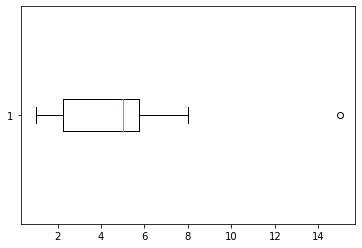

In [55]:
#==============================================================================   Simple Examples to start from.
t = plt.boxplot([1,2,2,15,3,4,5,5,5,5,6,8,7,1],vert=False)

In [57]:
T = pd.Series(index=range(14), data=[1,2,2,15,3,4,5,5,5,5,6,8,7,1])
T.describe()

count    14.000000
mean      4.928571
std       3.604789
min       1.000000
25%       2.250000
50%       5.000000
75%       5.750000
max      15.000000
dtype: float64